## Independent Data Exploration

impThis is the independent exploration project for Data 8. Please refer to Piazza and the Policies page for details on the project. Enter all of your code cells here for submission! You can either use this notebook directly or add the contents of this notebook to your own project notebook named `exploration.ipynb`. The following cell is required to submit.

In [1]:
!pip install xlrd
import pandas as pd 
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('exploration.ok')
_ = ok.auth(inline=True)

  Using cached xlrd-1.1.0-py2.py3-none-any.whl
Assignment: Independent Data Exploration
OK, version v1.12.5

Successfully logged in as rita.guo13@berkeley.edu


## 1. Independent Data Exploration


For my project, I'll be exploring the FBI Crime data set from ucr.fbi.gov. 
I'll be utilizing 5 different tables, each depicting type of crime instances and corresponding occurrence rate in the US, categorized by state. This data set includes a categorical variable "Area," representing whether the rates refer to cities, nonmetropolitan counties, or the state overall. As for quantifiable variables, this data set includes raw totals and also rates of specific crimes per 100,000 inhabitants.

In addition, I'll be utilizing the National Center for Education's statistics data to collect high school graduation rates from school years 2010 - 2015. The quantifiable variable is the graduation rate, which ranges as a number on a scale of 0 to 100. 



## Data Exploration and Cleansing

In [2]:
#Read data
crime2015 = pd.read_excel('crime2015.xls')
crime2015

,State,Area,Unnamed: 2,Population,Violent crime1,Murder and nonnegligent manslaughter,Rape (revised definition)2,Rape (legacy definition)3,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,ALABAMA,Metropolitan Statistical Area,NaN,3708033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,NaN,Area actually reporting,0.971,18122,283,1496.0,1080.0,4080,12263,113447,27208,78141.0,8098.0
2,ALABAMA,NaN,Estimated total,1,18500,287,1537.0,1111.0,4138,12538,115920,27852,79799.0,8269.0
3,ALABAMA,Cities outside metropolitan areas,NaN,522241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,NaN,Area actually reporting,0.974,3178,32,311.0,218.0,354,2481,20873,4438,15106.0,1329.0
5,ALABAMA,NaN,Estimated total,1,3240,33,315.0,222.0,360,2532,21203,4518,15329.0,1356.0
6,ALABAMA,Nonmetropolitan counties,NaN,628705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ALABAMA,NaN,Area actually reporting,0.994,1205,28,186.0,122.0,112,879,7578,2868,4004.0,706.0
8,ALABAMA,NaN,Estimated total,1,1212,28,187.0,123.0,113,884,7623,2885,4028.0,710.0
9,ALABAMA,State Total,NaN,4858979,22952,348,2039.0,1456.0,4611,15954,144746,35255,99156.0,10335.0


In [3]:
#Fill na with the value before it, we see na values because excel sheet not cleaned yet
crime2015.fillna(method = 'ffill', inplace = True)
crime2015

,State,Area,Unnamed: 2,Population,Violent crime1,Murder and nonnegligent manslaughter,Rape (revised definition)2,Rape (legacy definition)3,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,ALABAMA,Metropolitan Statistical Area,NaN,3708033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,Metropolitan Statistical Area,Area actually reporting,0.971,18122,283,1496.0,1080.0,4080,12263,113447,27208,78141.0,8098.0
2,ALABAMA,Metropolitan Statistical Area,Estimated total,1,18500,287,1537.0,1111.0,4138,12538,115920,27852,79799.0,8269.0
3,ALABAMA,Cities outside metropolitan areas,Estimated total,522241,18500,287,1537.0,1111.0,4138,12538,115920,27852,79799.0,8269.0
4,ALABAMA,Cities outside metropolitan areas,Area actually reporting,0.974,3178,32,311.0,218.0,354,2481,20873,4438,15106.0,1329.0
5,ALABAMA,Cities outside metropolitan areas,Estimated total,1,3240,33,315.0,222.0,360,2532,21203,4518,15329.0,1356.0
6,ALABAMA,Nonmetropolitan counties,Estimated total,628705,3240,33,315.0,222.0,360,2532,21203,4518,15329.0,1356.0
7,ALABAMA,Nonmetropolitan counties,Area actually reporting,0.994,1205,28,186.0,122.0,112,879,7578,2868,4004.0,706.0
8,ALABAMA,Nonmetropolitan counties,Estimated total,1,1212,28,187.0,123.0,113,884,7623,2885,4028.0,710.0
9,ALABAMA,State Total,Estimated total,4858979,22952,348,2039.0,1456.0,4611,15954,144746,35255,99156.0,10335.0


In [4]:
crime2015[crime2015['Area'] == 'State Total']
crime2015.reset_index(drop = True)

,State,Area,Unnamed: 2,Population,Violent crime1,Murder and nonnegligent manslaughter,Rape (revised definition)2,Rape (legacy definition)3,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,ALABAMA,Metropolitan Statistical Area,NaN,3708033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,Metropolitan Statistical Area,Area actually reporting,0.971,18122,283,1496.0,1080.0,4080,12263,113447,27208,78141.0,8098.0
2,ALABAMA,Metropolitan Statistical Area,Estimated total,1,18500,287,1537.0,1111.0,4138,12538,115920,27852,79799.0,8269.0
3,ALABAMA,Cities outside metropolitan areas,Estimated total,522241,18500,287,1537.0,1111.0,4138,12538,115920,27852,79799.0,8269.0
4,ALABAMA,Cities outside metropolitan areas,Area actually reporting,0.974,3178,32,311.0,218.0,354,2481,20873,4438,15106.0,1329.0
5,ALABAMA,Cities outside metropolitan areas,Estimated total,1,3240,33,315.0,222.0,360,2532,21203,4518,15329.0,1356.0
6,ALABAMA,Nonmetropolitan counties,Estimated total,628705,3240,33,315.0,222.0,360,2532,21203,4518,15329.0,1356.0
7,ALABAMA,Nonmetropolitan counties,Area actually reporting,0.994,1205,28,186.0,122.0,112,879,7578,2868,4004.0,706.0
8,ALABAMA,Nonmetropolitan counties,Estimated total,1,1212,28,187.0,123.0,113,884,7623,2885,4028.0,710.0
9,ALABAMA,State Total,Estimated total,4858979,22952,348,2039.0,1456.0,4611,15954,144746,35255,99156.0,10335.0


In [5]:
#import data from other years
crime2014 = pd.read_excel('crime2014.xls', header=0)
crime2013 = pd.read_excel('crime2013.xls', header=0)
crime2012 = pd.read_excel('crime2012.xls', header=0)
crime2011 = pd.read_excel('crime2011.xls', header=0)
crime2010 = pd.read_excel('crime2010.xls', header=0)

# Automate cleaning for each excel data set

In [6]:
#Function that automatically cleans each excel sheet, which is fed in as dataframe "df"

def clean(df):
    #fill na values with the value of the row above 
    df.fillna(method = 'ffill', inplace = True)
    #select the rows where the column 'Area' = 'State Total'
    df = df[df['Area'] == 'State Total']
    #return cleaned table with index reset to 0 start
    return df.reset_index(drop=True)
       


In [7]:
crime2010clean = clean(crime2010)
crime2010clean.head(10)

,State,Area,Unnamed: 2,Population,Violent crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Unnamed: 13
0,ALABAMA,State Total,Estimated total,4779736,18056,273,1349,4761,11673,168092,42034,115458.0,10600.0,
1,ALABAMA,State Total,"Rate per 100,000 inhabitants",4779736,377.8,5.7,28.2,99.6,244.2,3516.8,879.4,2415.6,221.8,
2,ALASKA,State Total,Area actually reporting,710231,4537,31,533,594,3379,20259,3105,15535.0,1619.0,
3,ALASKA,State Total,"Rate per 100,000 inhabitants",710231,638.8,4.4,75,83.6,475.8,2852.5,437.2,2187.3,228.0,
4,ARIZONA,State Total,Estimated total,6392017,26085,409,2165,6937,16574,225893,50771,153614.0,21508.0,
5,ARIZONA,State Total,"Rate per 100,000 inhabitants",6392017,408.1,6.4,33.9,108.5,259.3,3534,794.3,2403.2,336.5,
6,ARKANSAS,State Total,Estimated total,2915918,14735,138,1312,2372,10913,103775,32511,65720.0,5544.0,
7,ARKANSAS,State Total,"Rate per 100,000 inhabitants",2915918,505.3,4.7,45,81.3,374.3,3558.9,1114.9,2253.8,190.1,
8,CALIFORNIA,State Total,Area actually reporting,37253956,164133,1809,8331,58116,95877,981939,228857,600558.0,152524.0,
9,CALIFORNIA,State Total,"Rate per 100,000 inhabitants",37253956,440.6,4.9,22.4,156,257.4,2635.8,614.3,1612.1,409.4,


In [8]:
crime2011clean = clean(crime2011)
crime2011clean.head()

,State,Area,Unnamed: 2,Population,Violent crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,ALABAMA1,State Total,Estimated total,4802740,20174,301,1371,4910,13592,173190,51117,111411.0,10662.0
1,ALABAMA1,State Total,"Rate per 100,000 inhabitants",4802740,420.1,6.3,28.5,102.2,283,3606.1,1064.3,2319.7,222.0
2,ALASKA,State Total,Area actually reporting,722718,4383,29,420,576,3358,19028,2826,14859.0,1343.0
3,ALASKA,State Total,"Rate per 100,000 inhabitants",722718,606.5,4,58.1,79.7,464.6,2632.8,391,2056.0,185.8
4,ARIZONA,State Total,Estimated total,6482505,26311,405,2264,7127,16515,230422,54929,155664.0,19829.0


In [9]:
crime2012clean = clean(crime2012)
crime2012clean.head()

,State,Area,Unnamed: 2,Population,Violent crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,ALABAMA,State Total,Estimated total,4822023,21693,342,1296,5020,15035,168878,47481,111523.0,9874.0
1,ALABAMA,State Total,"Rate per 100,000 inhabitants",4822023,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
2,ALASKA,State Total,Area actually reporting,731449,4412,30,583,630,3169,20037,2950,15565.0,1522.0
3,ALASKA,State Total,"Rate per 100,000 inhabitants",731449,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
4,ARIZONA,State Total,Area actually reporting,6553255,28108,358,2277,7386,18087,231930,52934,159838.0,19158.0


In [10]:
crime2013clean = clean(crime2013)
crime2013clean

,State,Area,Unnamed: 2,Population,Violent crime1,Murder and nonnegligent manslaughter,Rape (revised definition)2,Rape (legacy definition)3,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,ALABAMA4,State Total,Estimated total,4833722,20826,347,2044.0,1428.0,4648,13787,161993,42429,108993.0,10571.0
1,ALABAMA4,State Total,"Rate per 100,000 inhabitants",4833722,430.8,7.2,42.3,29.5,96.2,285.2,3351.3,877.8,2254.8,218.7
2,ALASKA4,State Total,Area actually reporting,735132,4708,34,922.0,644.0,624,3128,21210,2916,16599.0,1695.0
3,ALASKA4,State Total,"Rate per 100,000 inhabitants",735132,640.4,4.6,125.4,87.6,84.9,425.5,2885.2,396.7,2258.0,230.6
4,"ARIZONA5,6",State Total,Area actually reporting,6626624,27599,357,3050.0,2343.0,6702,17490,225243,48533,159272.0,17438.0
5,"ARIZONA5,6",State Total,"Rate per 100,000 inhabitants",6626624,416.5,5.4,46.0,35.4,101.1,263.9,3399.1,732.4,2403.5,263.2
6,ARKANSAS4,State Total,Estimated total,2959373,13621,159,1423.0,993.0,2258,9781,106613,30485,70450.0,5678.0
7,ARKANSAS4,State Total,"Rate per 100,000 inhabitants",2959373,460.3,5.4,48.1,33.6,76.3,330.5,3602.6,1030.1,2380.6,191.9
8,CALIFORNIA,State Total,Area actually reporting,38332521,154129,1746,9714.0,7464.0,53640,89029,1018907,232058,621557.0,165292.0
9,CALIFORNIA,State Total,"Rate per 100,000 inhabitants",38332521,402.1,4.6,25.3,19.5,139.9,232.3,2658.1,605.4,1621.5,431.2


In [11]:
crime2014clean = clean(crime2014)
crime2014clean.head()

,State,Area,Unnamed: 2,Population,Violent crime1,Murder and nonnegligent manslaughter,Rape (revised definition)2,Rape (legacy definition)3,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,ALABAMA4,State Total,Estimated total,4849377,20727,276,2005.0,1436.0,4701,13745,154094,39715,104238.0,10141.0
1,ALABAMA4,State Total,"Rate per 100,000 inhabitants",4849377,427.4,5.7,41.3,29.6,96.9,283.4,3177.6,819,2149.5,209.1
2,ALASKA4,State Total,Area actually reporting,736732,4684,41,771.0,555.0,629,3243,20334,3150,15445.0,1739.0
3,ALASKA4,State Total,"Rate per 100,000 inhabitants",736732,635.8,5.6,104.7,75.3,85.4,440.2,2760,427.6,2096.4,236.0
4,ARIZONA4,State Total,Area actually reporting,6731484,26916,319,3378.0,2464.0,6249,16970,215240,43562,154091.0,17587.0


In [12]:
#Function that returns cleaned data with only each state's crime rate per 100,000 inhabitants
def get_rate(table):
    remove_estimated = table[table['Unnamed: 2'] != 'Estimated total']
    final_table = remove_estimated[remove_estimated['Unnamed: 2'] != 'Area actually reporting']
    #remove all numbers in state names 
    final_table['State'] = final_table['State'].str.replace('\d+','')
    #remove punctuation in state names
    final_table['State'] = final_table['State'].str.replace(',','')
    #remove duplicates of states
    final_table = final_table.drop_duplicates(subset='State', keep='first')
    #return the table with reset indexes
    return final_table.reset_index(drop=True)
    


In [13]:
get_rate(crime2012clean)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Area,Unnamed: 2,Population,Violent crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,ALABAMA,State Total,"Rate per 100,000 inhabitants",4822023,449.9,7.1,26.9,104.1,311.8,3502.2,984.7,2312.8,204.8
1,ALASKA,State Total,"Rate per 100,000 inhabitants",731449,603.2,4.1,79.7,86.1,433.2,2739.4,403.3,2128.0,208.1
2,ARIZONA,State Total,"Rate per 100,000 inhabitants",6553255,428.9,5.5,34.7,112.7,276,3539.2,807.8,2439.1,292.3
3,ARKANSAS,State Total,"Rate per 100,000 inhabitants",2949131,469.1,5.9,42.3,78.7,342.3,3660.1,1081.3,2384.7,194.1
4,CALIFORNIA,State Total,"Rate per 100,000 inhabitants",38041430,423.1,5,20.6,148.6,248.9,2758.7,646.1,1669.5,443.2
5,COLORADO,State Total,"Rate per 100,000 inhabitants",5187582,308.9,3.1,40.7,65.4,199.6,2684.7,504.2,1947.4,233.1
6,CONNECTICUT,State Total,"Rate per 100,000 inhabitants",3590347,283,4.1,25.6,102.7,150.6,2140,409.7,1550.7,179.6
7,DELAWARE,State Total,"Rate per 100,000 inhabitants",917092,547.4,6.2,26.5,162.7,352,3340.9,803.7,2380.6,156.6
8,FLORIDA,State Total,"Rate per 100,000 inhabitants",19317568,487.1,5.2,27.2,123.7,330.9,3276.7,794.9,2288.6,193.2
9,GEORGIA,State Total,"Rate per 100,000 inhabitants",9919945,378.9,5.9,21.4,125.6,226,3410.6,874.9,2248.0,287.7


In [14]:
#All final crime tables
crime2010final = get_rate(crime2010clean)
crime2011final = get_rate(crime2011clean)
crime2012final = get_rate(crime2012clean)
crime2013final = get_rate(crime2013clean)
crime2014final = get_rate(crime2014clean)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Cleaning Graduation Rates Data

In [15]:
#read in new table of graduation rates and drop all nan values,
#drop DC because it is not distinguished in FBI Crime data
grads = pd.read_excel('gradrates.xls')
grads.dropna(how='any', inplace=True)
grads.drop('District of Columbia', inplace=True)

In [16]:
#Select only graduation rates for each state and the national average.
grad = grads.iloc[1:, [0,1,2,3,4]]
grad

,2010-11,2011-12,2012-13,2013-14,2014-15
Alabama,72,75,80,86.3,89.3
Alaska,68,70,71.8,71.1,75.6
Arizona,78,76,75.1,75.7,77.4
Arkansas,81,84,84.9,86.9,84.9
California,76,79,80.4,81.0,82.0
Colorado,74,75,76.9,77.3,77.3
Connecticut,83,85,85.5,87.0,87.2
Delaware,78,80,80.4,87.0,85.6
Florida,71,75,75.6,76.1,77.9
Georgia,67,70,71.7,72.5,78.8


In [241]:
# two failed attempts at getting rid of "---" values

#this didn't work because it just got rid of the --- values
#pd.Series(grad['2010-11']).convert_objects(convert_numeric=True)

#this makes sense but doesn't work in terms of turning the --- into a 0
# grad_copy = grad
# grad2010 = [grad_copy['2010-11']]
# map(lambda x:0 if x== '---' else x, grad2010)


In [18]:
#Filling in the estimated rates for Idaho by taking the difference of the values we got and applying that linearly for each year. 
#the difference was 1.6 so we just subtracted 1.6 from each year and that would be the grad rate for the previous year.
grad.iloc[11,0] = 72.5
grad.iloc[11,1] = 74.1
grad.iloc[11,2] = 75.7

In [19]:
# predicted grad rates for Kentucky done by taking the average grade rate difference and applying that to two unknown years
grad.iloc[16,0] = 84.2
grad.iloc[16,1] = 85.15

In [20]:
#predicted grad rates for Oklahoma 
grad.iloc[35,0] = 86.7
grad.iloc[35,1] = 85.75

##### Merging columns using pandas, will merge using data sci tables later to fill requirement.

In [22]:
#inserts column with grad rates
crime2010final['grad rates 2010-11'] = np.array(grad['2010-11'])

In [242]:
#Crime2013 had erroneous extra last row
#drop michigan + hawaii b/c those rates incorrect
crime2010final2 = crime2010final.drop(10).drop(21)
crime2011final2 = crime2011final.drop(10).drop(21)
crime2012final2 = crime2012final.drop(10).drop(21)
crime2013final2 = crime2013final.drop(50).drop(10).drop(21)
crime2014final2 = crime2014final.drop(10).drop(21)

In [24]:
#drop Michigan/Hawaii grad rates, data is raw total rather than rates per 100k inhabitants.
finalgrad2010 = grad['2010-11'].drop('Hawaii').drop('Michigan')
finalgrad2011 = grad['2011-12'].drop('Hawaii').drop('Michigan')
finalgrad2012 = grad['2012-13'].drop('Hawaii').drop('Michigan')
finalgrad2013 = grad['2013-14'].drop('Hawaii').drop('Michigan')
finalgrad2014 = grad['2014-15'].drop('Hawaii').drop('Michigan')

##### Merging all grad rates with all crime data tables.

In [25]:
crime2010final2['grad rates 2010-11'] = np.array(finalgrad2010)
crime2011final2['grad rates 2011-12'] = np.array(finalgrad2011)
crime2012final2['grad rates 2012-13'] = np.array(finalgrad2012)
crime2013final2['grad rates 2013-14'] = np.array(finalgrad2013)
crime2014final2['grad rates 2014-15'] = np.array(finalgrad2014)

# Converting Dataframes to Data Sci Tables

In [26]:
#convert all to data sci tables for plotting
final2010 = Table.from_df(crime2010final2)
final2011 = Table.from_df(crime2011final2)
final2012 = Table.from_df(crime2012final2)
final2013 = Table.from_df(crime2013final2)
final2014 = Table.from_df(crime2014final2)

# Visualizing Data: Pt 1

Visualize some quantitative variable(s) of the data in a way that summarizes the data effectively and write a short observational description.

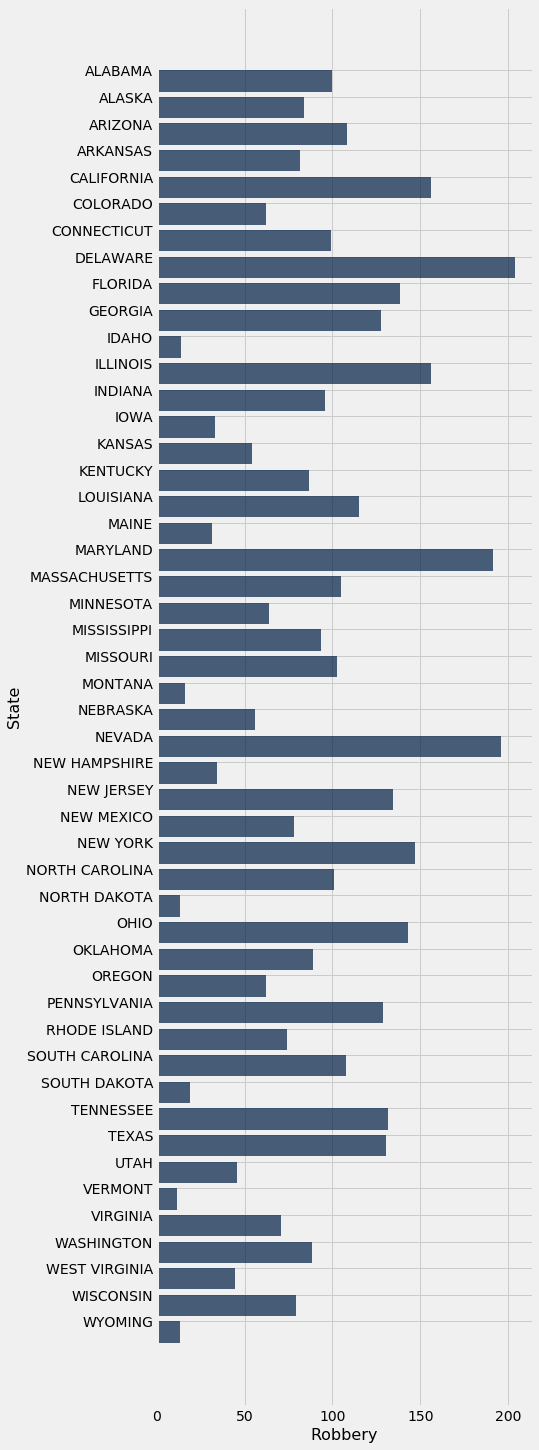

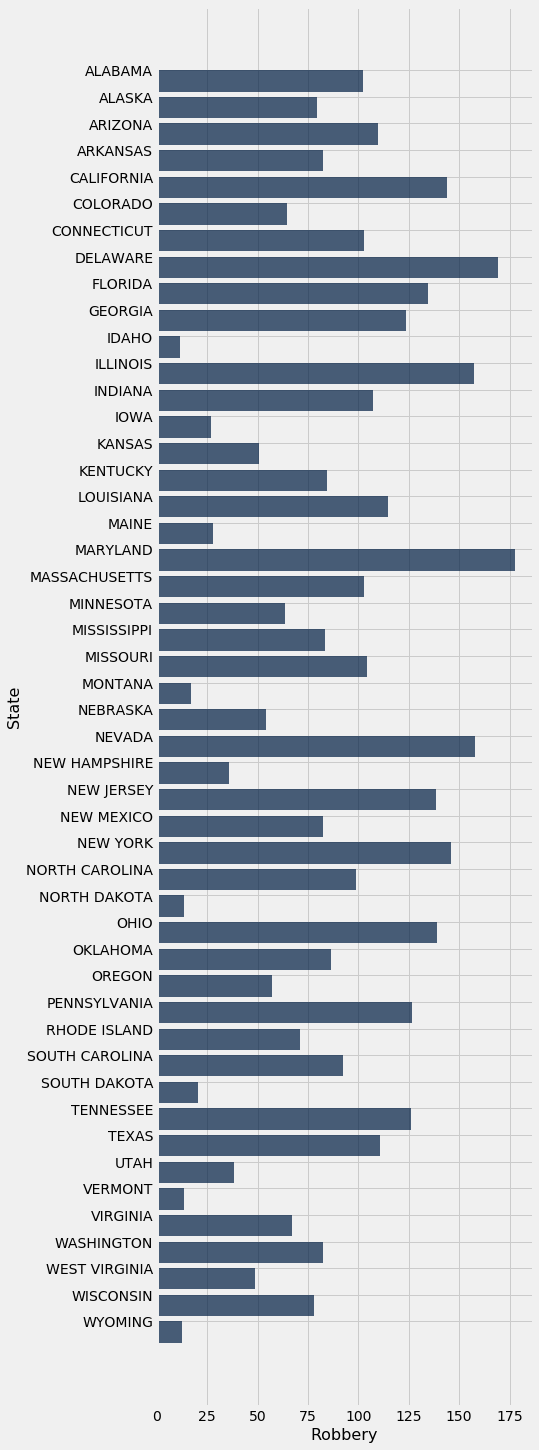

In [27]:
#Some examples of visualizing quantitative variable, shows robbery rate per 100k inhabitants.
final2010.barh('State', 'Robbery')
final2011.barh('State', 'Robbery')

### Visualizing Data Pt 2: Mapping quantitative variables.

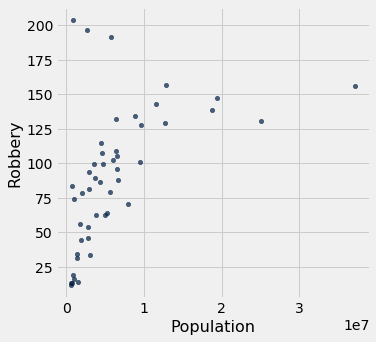

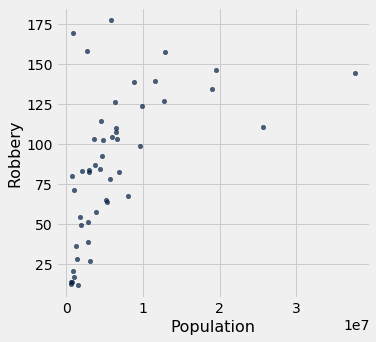

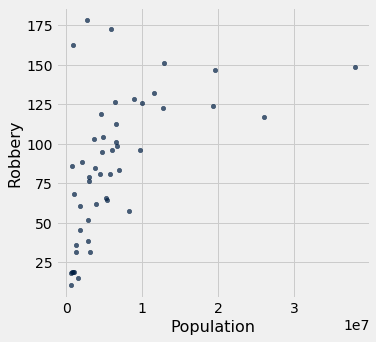

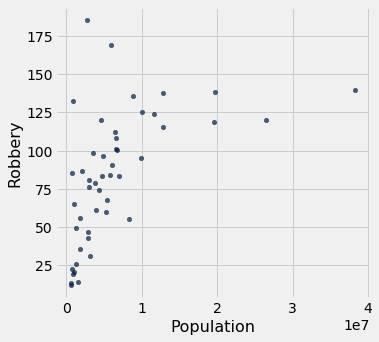

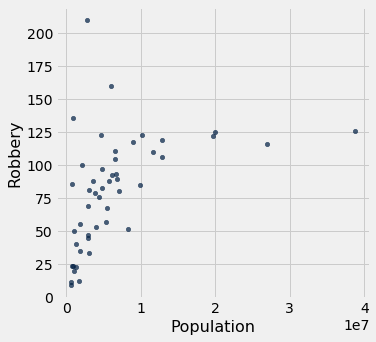

In [246]:
#scattering population to robbery 
final2010.scatter('Population', 'Robbery')
final2011.scatter('Population', 'Robbery')
final2012.scatter('Population', 'Robbery')
final2013.scatter('Population', 'Robbery')
final2014.scatter('Population', 'Robbery')

### Trend: States with higher population with more instances of robbery. Instances of robbery per 100k inhabitants decreased over a 5 year time period. 

## Requirements 2 & 5: Joining tables, then visualizing a quantitative variable.

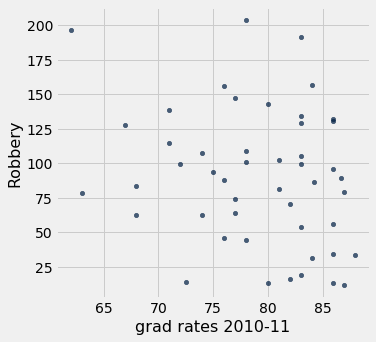

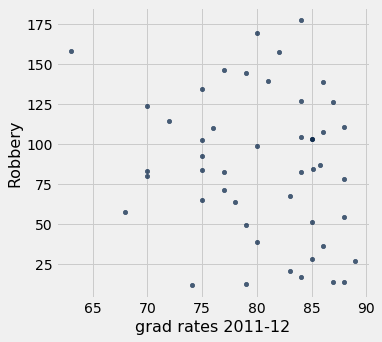

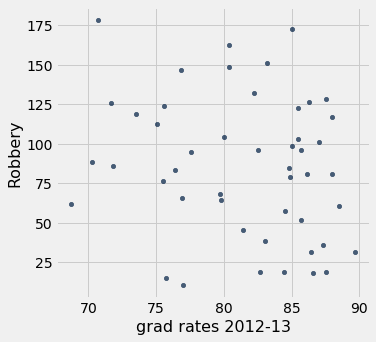

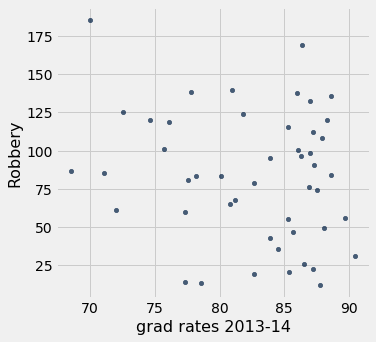

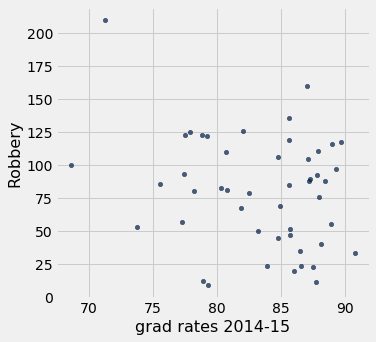

In [33]:
#Scattering grad rates + robbery
final2010.scatter('grad rates 2010-11', 'Robbery')
final2011.scatter('grad rates 2011-12', 'Robbery')
final2012.scatter('grad rates 2012-13', 'Robbery')
final2013.scatter('grad rates 2013-14', 'Robbery')
final2014.scatter('grad rates 2014-15', 'Robbery')

### Trend: Seems to be an increasingly negative association between higher grad rates and robbbery instances per 100k inhabitants over years 2010-2015.

# Joining Tables using Data Sci Tables Module


In [247]:
#array of states
states = final2010.column(0)

#turn grad rates into a dataframe
grad10_df = finalgrad2010.to_frame()
# grad10_df
# grad10_df

#convert df to datasci tables, add states as array
grad10 = Table().from_df(grad10_df)
grad10 = grad10.with_column('State', states).move_to_start('State')

#join tables
joined = final2010.join('State', grad10)
joined



State,Area,Unnamed: 2,Population,Violent crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Unnamed: 13,grad rates 2010-11,2010-11
ALABAMA,State Total,"Rate per 100,000 inhabitants",4779736,377.8,5.7,28.2,99.6,244.2,3516.8,879.4,2415.6,221.8,,72,72
ALASKA,State Total,"Rate per 100,000 inhabitants",710231,638.8,4.4,75,83.6,475.8,2852.5,437.2,2187.3,228,,68,68
ARIZONA,State Total,"Rate per 100,000 inhabitants",6392017,408.1,6.4,33.9,108.5,259.3,3534,794.3,2403.2,336.5,,78,78
ARKANSAS,State Total,"Rate per 100,000 inhabitants",2915918,505.3,4.7,45,81.3,374.3,3558.9,1114.9,2253.8,190.1,,81,81
CALIFORNIA,State Total,"Rate per 100,000 inhabitants",37253956,440.6,4.9,22.4,156,257.4,2635.8,614.3,1612.1,409.4,,76,76
COLORADO,State Total,"Rate per 100,000 inhabitants",5029196,320.8,2.4,43.7,62.3,212.4,2684.2,520,1940.5,223.6,,74,74
CONNECTICUT,State Total,"Rate per 100,000 inhabitants",3574097,281.4,3.6,16.3,99.4,162,2193.2,424.5,1581,187.7,,83,83
DELAWARE,State Total,"Rate per 100,000 inhabitants",897934,620.9,5.3,34.7,203.7,377.1,3448.2,836.9,2396.5,214.8,,78,78
FLORIDA,State Total,"Rate per 100,000 inhabitants",18801310,542.4,5.2,28.6,138.7,369.8,3558.4,899.5,2438.4,220.5,,71,71
GEORGIA,State Total,"Rate per 100,000 inhabitants",9687653,403.3,5.8,21.6,127.7,248.2,3640.5,998.4,2329.3,312.8,,67,67


# Grouping Tables and Findings

I grouped by "Area", with the function np.average so I could see a nationwide average for all types of crime and also grad rates in 2010-2011. 

In [248]:
grouped2010 = final2010.group('Area', np.average).drop(1, 2, 13)
grouped2010

Area,Population average,Violent crime average,Murder and nonnegligent manslaughter average,Forcible rape average,Robbery average,Aggravated assault average,Property crime average,Burglary average,Larceny- theft average,Motor vehicle theft average,grad rates 2010-11 average
State Total,6.18541e+06,365.135,4.15208,30.6771,89.9896,240.317,2849.74,663.798,1983.98,201.942,79.0083


In [249]:
grouped2011 = final2011.group('Area', np.average).drop(1,2)
grouped2012 = final2012.group('Area', np.average).drop(1,2)
grouped2013 = final2013.group('Area', np.average).drop(1,2, 13)
grouped2014 = final2014.group('Area', np.average).drop(1,2, 13)

In [250]:
national_averages = Table().with_columns('Year', [2010, 2011, 2012, 2013, 2014],
                             'Population average', [grouped2010.column('Population average').take(0), 
                                                    grouped2011.column('Population average').take(0),
                                                    grouped2012.column('Population average').take(0), 
                                                    grouped2013.column('Population average').take(0), 
                                                    grouped2014.column('Population average').take(0)], 
                            'Violent crime average', [grouped2010.column(2).take(0),
                                                      grouped2011.column(2).take(0),
                                                      grouped2012.column(2).take(0),
                                                      grouped2013.column(2).take(0),
                                                      grouped2014.column(2).take(0)], 
                            'Grad rates average', [grouped2010.column(11).take(0),
                                                   grouped2011.column(11).take(0),
                                                   grouped2012.column(11).take(0),
                                                   grouped2013.column(11).take(0),
                                                   grouped2014.column(11).take(0)], 
                            'Robbery average', [grouped2010.column(5).take(0),
                                                   grouped2011.column(5).take(0),
                                                   grouped2012.column(5).take(0),
                                                   grouped2013.column(5).take(0),
                                                   grouped2014.column(5).take(0)])

national_averages

Year,Population average,Violent crime average,Grad rates average,Robbery average
2010,6.18541e+06,365.135,79.0083,89.9896
2011,6.24423e+06,352.183,80.3542,86.2708
2012,6.29179e+06,354.117,81.4271,86.1
2013,6.33714e+06,349.033,82.5521,28.8479
2014,6.3931e+06,346.954,83.3875,28.7917


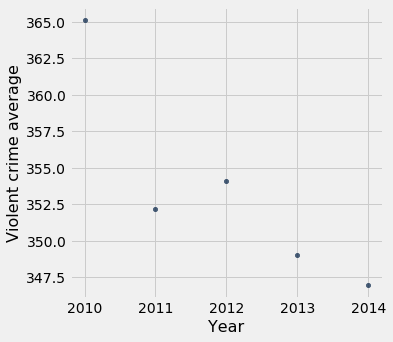

In [251]:
#Visualizing
national_averages.scatter('Year', 'Violent crime average')

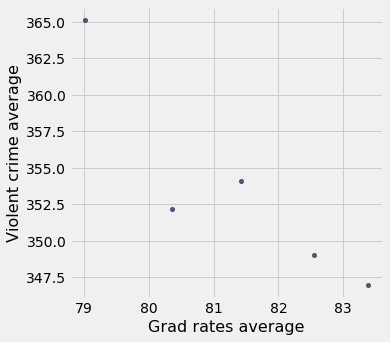

In [252]:
national_averages.scatter('Grad rates average', 'Violent crime average')

# Grouped Tables Conclusion

Utilizing grouped tables for national averages across each year from 2010-2014, I created a table including grad rates and violent crime rates averaged over the same time span. Then, I plotted violent crime over time, where we can see a visible downward trend in the 5 years. 

Next, I plotted grad rate averages against violent crime averages over the same time period, and similarly found a downward trend over this time period. We can see that an increase in grad rates is associated with a decrease in violent crime average, although we cannot specify whether this is causal. 

# Hypothesis Testing

Null Hypothesis: The decrease in crime rates over time is due to chance. 

Alternative Hypothesis: The decrease in crime rates over time is not due to chance but some additional factor. 

Idea: using national averages, ratio of robbery for each state to the grad rate should be within 5% p-value cutoff of national average. 



In [81]:
#Ratio of National average violent crime rate to national average grad rate averaged across all years.
ratio_all_years = np.mean(national_averages.column('Violent crime average').take(np.arange(5)) / national_averages.column('Grad rates average').take(0))
ratio_all_years

4.4740164539605534

#### Empirical Simulation

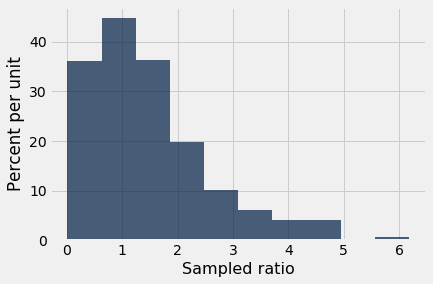

In [253]:
final2010

# #Ratio of National average violent crime rate to national average grad rate in 2010-11
# ratio2010 = national_averages.column('Violent crime average').take(0) / national_averages.column('Grad rates average').take(0)
# ratio2010

array_of_ratios = make_array()

#Create an array of ratios of Violent crime to grad rates, in order to sample randomly.
ratios_2010 = final2010.column('Violent\ncrime') / final2010.column('grad rates 2010-11')
ratios_2011 = final2011.column(4) / final2011.column('grad rates 2011-12')
ratios_2012 = final2012.column('Violent\ncrime') / final2012.column('grad rates 2012-13')
ratios_2013 = final2013.column('Violent\ncrime1') / final2013.column('grad rates 2013-14')
ratios_2014 = final2014.column('Violent crime1') / final2014.column('grad rates 2014-15')

array_of_ratios = np.append(ratios_2010, array_of_ratios)
array_of_ratios = np.append(ratios_2011, array_of_ratios)
array_of_ratios = np.append(ratios_2012, array_of_ratios)
array_of_ratios = np.append(ratios_2013, array_of_ratios)
array_of_ratios = np.append(ratios_2014, array_of_ratios)

trials = 10000

def simulate_sample():
    statistics = make_array()
    for i in range(trials):
        sample = np.random.choice(array_of_ratios, 10)
        statistics = np.append(statistics, abs(sample - ratio_all_years))
    return statistics

sampled_ratios = simulate_sample()

Table().with_column('Sampled ratio', sampled_ratios).hist()
    
    

In [254]:
#approximation of p-value based on empirical data
find_empirical_p = np.count_nonzero(sampled_ratios >= ratio_all_years)/trials
find_empirical_p
    
#p val =  0.20. The smaller the p value, the greater distance from
#median, and the smaller tail, which would support alternative. 
# If p is less than 0.05, statistically significant at 95% confidence level.

0.2034

#### Simulation for Sample Means

Empirical p value: 0.5532


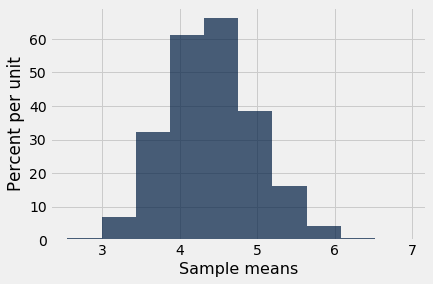

In [91]:
#Simulate empirical distribution for sample means.

repetitions = 10000
means = make_array()

ratio_array_table = Table().with_column('Ratio', array_of_ratios)

for i in np.arange(repetitions):
    new_mean = ratio_array_table.sample(10, with_replacement=False).column('Ratio').mean()
    means = np.append(means, new_mean)
    
emp_p_value = np.count_nonzero(means <= ratio_all_years)/repetitions
print("Empirical p value:", emp_p_value)

results = Table().with_column('Sample means', means)
results.hist()

### With a p value cutoff of 0.05, our result and empirical p-value is not statistifcally significant. We cannot reject the null hypothesis that decrease in crime rates is due to chance.

# Prediction


For my data, I wanted to explore any association between crime rates and high school graduation rates. I want to predict the robbery rate based on the grad rate. 

Below, I've consolidated all robbery data and grad rate data into one full table in order to build a predictor function to test the association between the two variables.

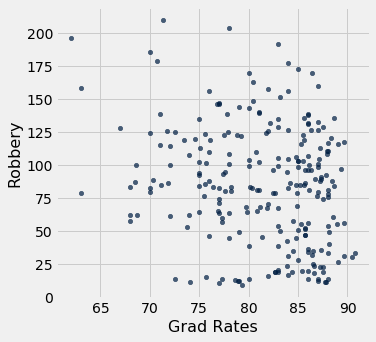

In [255]:
robbery_array = make_array()
grad_array = make_array()

#add all robbery data to an array
robbery_array = np.append(robbery_array, final2010.column('Robbery'))
robbery_array = np.append(robbery_array, final2011.column('Robbery'))
robbery_array = np.append(robbery_array, final2012.column('Robbery'))
robbery_array = np.append(robbery_array, final2013.column('Robbery'))
robbery_array = np.append(robbery_array, final2014.column('Robbery'))

#add all grad rates data in an array
grad_array = np.append(grad_array, final2010.column('grad rates 2010-11'))
grad_array = np.append(grad_array, final2011.column('grad rates 2011-12'))
grad_array = np.append(grad_array, final2012.column('grad rates 2012-13'))
grad_array = np.append(grad_array, final2013.column('grad rates 2013-14'))
grad_array = np.append(grad_array, final2014.column('grad rates 2014-15'))

#Visualize!
full_robbery_grad = Table().with_columns('Robbery', robbery_array, 
                                        'Grad Rates', grad_array)

full_robbery_grad.scatter('Grad Rates', 'Robbery')


In [217]:
#Function to predict robbery rate per 100k inhabitants from grad rate
def predict_robbery_rate(grad_rate):
    close_points = full_robbery_grad.where('Grad Rates', are.between(grad_rate + 2.5, grad_rate - 2.5))
    return close_points.column('Robbery').mean()
    

I wrote a function that takes in a grad rate as its parameter, and then returns the average robbery rate for states with grad rates within 2.5 of the given parameter. 

My measure of closeness as 2.5 (equal to 2.5%) is relatively arbitrary. 

In [228]:
#Apply predict_robbery_rate to all grad rates
robbery_with_predictions = full_robbery_grad.with_column('Prediction', 
                                                         full_robbery_grad.apply(predict_robbery_rate, 'Robbery'))

robbery_with_predictions

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/srv/app/venv/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Robbery,Grad Rates,Prediction
99.6,72,nan
83.6,68,90.45
108.5,78,nan
81.3,81,nan
156,76,nan
62.3,74,nan
99.4,83,nan
203.7,78,nan
138.7,71,nan
127.7,67,nan


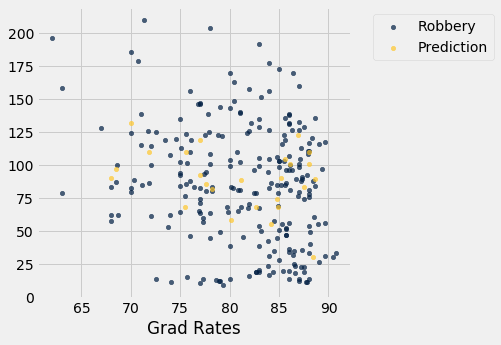

In [229]:
robbery_with_predictions.scatter('Grad Rates')

## Iteration 2: Prediction using Standard Units 

In [220]:
#define function to convert arrays to standard units

def standard_units(x):
    #convert array of numbers to standard units
    return (x - np.mean(x))/np.std(x)  

rob_grad_SU = Table().with_columns(
    'Grad Rates SU', standard_units(full_robbery_grad.column('Grad Rates')),
    'Robbery SU', standard_units(full_robbery_grad.column('Robbery')))

rob_grad_SU


Grad Rates SU,Robbery SU
-1.55053,0.323879
-2.21415,-0.0342457
-0.555093,0.523086
-0.0573758,-0.0857261
-0.886905,1.58627
-1.21872,-0.510999
0.274436,0.319403
-0.555093,2.65393
-1.71643,1.19905
-2.38006,0.952836


In [221]:
#Predict using a better measure of "closeness" for regression. 
sd_gradrates = np.std(full_robbery_grad.column(0))
sd_gradrates

44.677161577999406

In [222]:
1/sd_gradrates

#So we know that 1% is about 0.02 SD's. 

0.022382800622957097

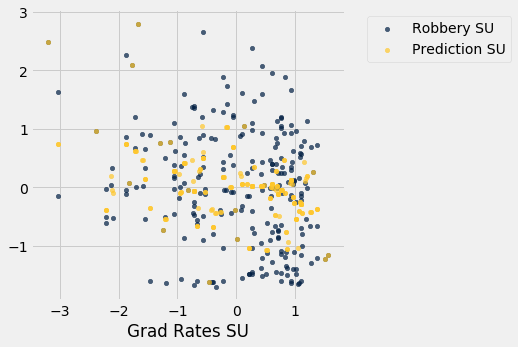

In [234]:
#function predicting robbery rate with standard units

def predict_robbery_su(grad_rate_SU):
    close = 1/sd_gradrates
    close_points = rob_grad_SU.where('Grad Rates SU', are.between(grad_rate_SU-close, grad_rate_SU + close))
    return close_points.column('Robbery SU').mean()   

#Visualize
robbery_with_su_predict = rob_grad_SU.with_column(
    'Prediction SU', rob_grad_SU.apply(predict_robbery_su, 'Grad Rates SU')
    )

robbery_with_su_predict.scatter('Grad Rates SU')

## Iteration 3: Prediction Using Regression

In [235]:
#find r, slope, intercept

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))


r = correlation(full_robbery_grad, 'Grad Rates', 'Robbery')
print('R:', r)

slope = slope(full_robbery_grad, 'Grad Rates', 'Robbery')
print('Slope:', slope)

intercept = np.mean(full_robbery_grad.column('Robbery')) - slope*np.mean(full_robbery_grad.column('Grad Rates'))
print('Intercept:', intercept)

R: -0.225048706761
Slope: -1.66810601265
Intercept: 220.823473688


In [236]:
#Equation for regression line
#y = -1.6x + 220.823


#Find regression predictions

robbery_with_predictions = robbery_with_predictions.with_column('Regression Predictions', 
                        slope * full_robbery_grad.column('Grad Rates') + intercept)

robbery_with_predictions

Robbery,Grad Rates,Prediction,Regression Predictions
99.6,72,nan,100.72
83.6,68,90.45,107.392
108.5,78,nan,90.7112
81.3,81,nan,85.7069
156,76,nan,94.0474
62.3,74,nan,97.3836
99.4,83,nan,82.3707
203.7,78,nan,90.7112
138.7,71,nan,102.388
127.7,67,nan,109.06


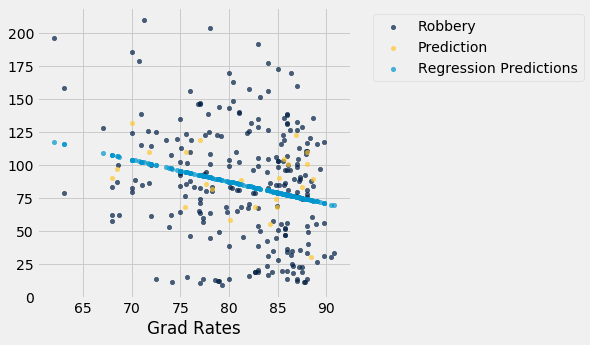

In [237]:
robbery_with_predictions.scatter('Grad Rates')

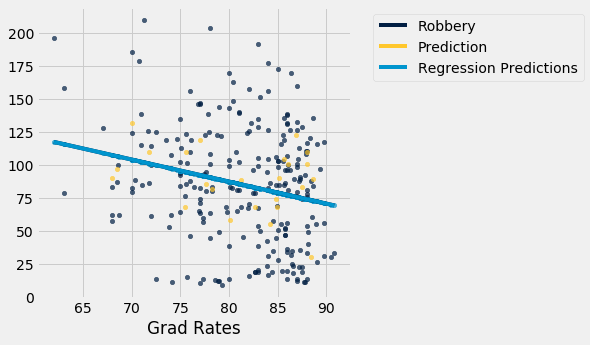

In [238]:
robbery_with_predictions.scatter('Grad Rates', fit_line = True)

We can see my original predictions using an arbitrary measure of closeness (Grad rates + 2.5, grad rates - 2.5) in the yellow dots. 

In iteration 2, I utilized regression predictions by calculating correlation, the slope, and the intercept. We can see that these predictions do a much better job of approximating the center of the vertical axis, Robbery rates. I've also included a regression best-fit line. 

# Independent Data Exploration Conclusion

In this exploration of FBI crime data and high school graduation rates in America, we have delved deeper into the data to look for associations between quantitative variables. 

Based on our hypothesis testing at a p-value cutoff of 0.05, we cannot reject the null hypothesis that changes in crime rates are due to chance. 

Upon creating a predictor and identifying regression trends by calculating correlation, slope, and the intercept, we can see that there is a negative association between specifically robbery in years 2010-2014 and graduation rates from 2010-2014. 

We cannot make final conclusions about causality between our two variables, however we can acknowledge the negative association between robbery and US high school graduation rates. If we were to expand upon this project, we could check for association between other types of crimes and graduation rates. 

## 2. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [256]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'exploration.ipynb'.
Submit... 100% complete
Submission successful for user: rita.guo13@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/exploration/submissions/P1YEyW

